In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = keras.datasets.fashion_mnist

(train_img, train_labels), (test_img, test_labels) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
type(train_img)
train_img.shape # 60000 imgs, each of size 28 x 28 ---- white = 255, black = 0

(60000, 28, 28)

In [ ]:
train_img[0,20,20]  # one pixel - from img 0, pixel @ pos = 20,20

218

In [ ]:
train_labels[:15]  # values from 0 and 9 representing 10 different classes - one label for each class

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7], dtype=uint8)

In [ ]:
class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

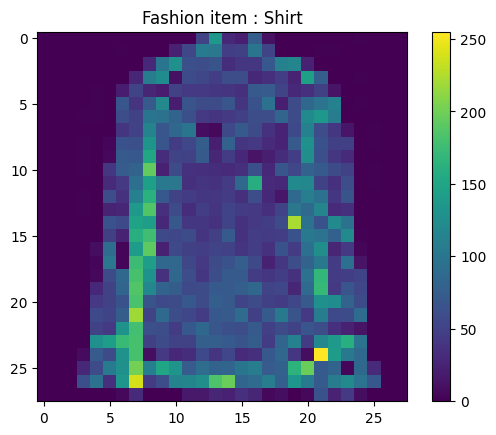

In [ ]:
item = np.random.randint(0,60000)
plt.figure()
plt.imshow(train_img[item])
plt.colorbar()
plt.grid(False)
plt.title('Fashion item : ' + (class_names[train_labels[item]]))
plt.show()

In [ ]:
# preprocessing -- getting all values to be between 0 and 1 by dividing every pixel by 255
train_img = train_img / 255
test_img = test_img / 255

In [ ]:
print(train_img[0, 15, 15])  # the pixel at 15,15 in the 0-index (=1st) image

0.8666666666666667


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),           # input layer
    keras.layers.Dense(196, activation= 'relu'),   # hidden layer
    keras.layers.Dense(100, activation='relu' ),    # softplus is a smooth variant of relu
    keras.layers.Dense(10, activation= 'softmax')  # output layer - softmax because classes are exclusive and prob. dist. - one neuron per class
    ])

In [ ]:
model.summary() # displays layers, output shapes, and parameter counts

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 196)               153860    
                                                                 
 dense_4 (Dense)             (None, 100)               19700     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 174570 (681.91 KB)
Trainable params: 174570 (681.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden = model.get_layer('dense_2')
weights, biases = hidden.get_weights()
print(f"Weights :\n{weights}")
print(f"Biases :\n{biases}")

In [ ]:
model.compile(optimizer= 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [ ]:
history = model.fit(train_img, train_labels, epochs=30, batch_size=40, validation_split=0.1)

Epoch 1/30
1350/1350 [==============================] - 13s 9ms/step - loss: 0.4961 - accuracy: 0.8227 - val_loss: 0.3768 - val_accuracy: 0.8610
Epoch 2/30
1350/1350 [==============================] - 10s 7ms/step - loss: 0.3635 - accuracy: 0.8679 - val_loss: 0.3480 - val_accuracy: 0.8682
Epoch 3/30
1350/1350 [==============================] - 7s 5ms/step - loss: 0.3323 - accuracy: 0.8786 - val_loss: 0.3383 - val_accuracy: 0.8750
Epoch 4/30
1350/1350 [==============================] - 8s 6ms/step - loss: 0.3083 - accuracy: 0.8862 - val_loss: 0.3370 - val_accuracy: 0.8815
Epoch 5/30
1350/1350 [==============================] - 7s 5ms/step - loss: 0.2891 - accuracy: 0.8915 - val_loss: 0.3725 - val_accuracy: 0.8665
Epoch 6/30
1350/1350 [==============================] - 9s 7ms/step - loss: 0.2734 - accuracy: 0.8985 - val_loss: 0.3379 - val_accuracy: 0.8775
Epoch 7/30
1350/1350 [==============================] - 7s 5ms/step - loss: 0.2603 - accuracy: 0.9025 - val_loss: 0.3335 - val_accurac

In [ ]:
test_loss, test_acc = model.evaluate(test_img, test_labels, verbose=1)
print(f'Accuracy : {test_acc}\nLoss : {test_loss}')

313/313 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.8856
Accuracy : 0.8855999708175659
Loss : 0.5337442755699158


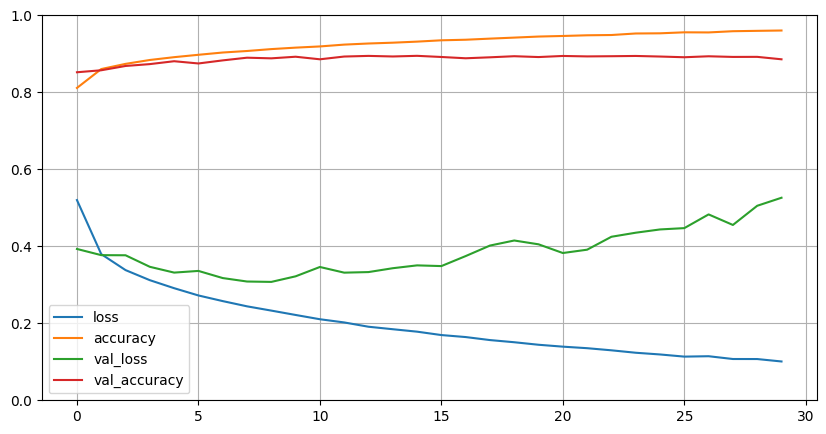

In [ ]:
## learning curves -- sharp edges are due to epochs / GD steps?

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
predictions = model.predict(test_img)
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[1.61749769e-12 2.96523764e-20 1.74963492e-13 ... 1.49250023e-09
  2.43664253e-15 9.99999940e-01]
 [1.97326585e-06 1.15504564e-17 9.99712706e-01 ... 1.72296257e-11
  1.47980586e-12 1.77771362e-14]
 [1.40705727e-35 9.99999940e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.34395965e-21 1.18182490e-32 3.78735932e-22 ... 9.62000919e-19
  9.99999940e-01 6.51720149e-26]
 [1.73152086e-29 9.99999940e-01 1.06478352e-36 ... 1.75444884e-26
  6.26131625e-19 1.28997428e-32]
 [4.70675965e-15 2.17549713e-20 1.07652338e-10 ... 1.42333329e-13
  1.57591761e-15 4.15784371e-20]]


In [ ]:
print(predictions[np.random.randint(0,len(test_img))]) # each predicion is a P-distribution, with P(class) for each of the 10 classes

[7.0597879e-14 2.7652231e-10 1.2587750e-11 4.8904412e-11 1.4717735e-13
 1.0408713e-06 1.0446698e-12 1.0548446e-04 3.0896600e-12 9.9989337e-01]


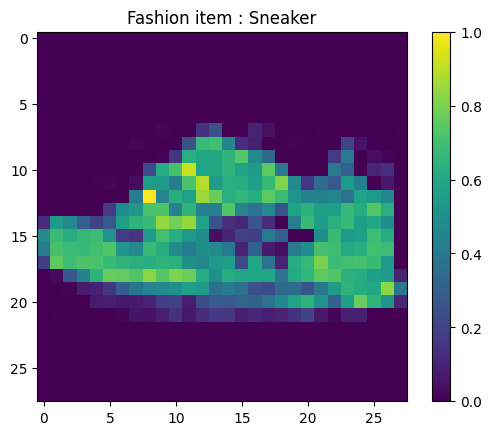

Prediction : Sneaker


In [ ]:
# our target is the value of the greatest probability
# we use np.argmax to get index of the max element in numpy array

pred = np.random.randint(0,len(test_img))
plt.figure()
plt.imshow(test_img[pred])
plt.colorbar()
plt.grid(False)
plt.title('Fashion item : ' + (class_names[test_labels[pred]]))
plt.show()
print(f'Prediction : {class_names[np.argmax(predictions[pred])]}')

In [ ]:
def pred_from_inp(inp):
    while(True):
        inp = str(inp)
        if inp.isdigit() :
            inp = int(inp)
            break
        else :
            print("Invalid argument. Use a number.")
            return

    plt.figure()
    plt.imshow(test_img[inp], cmap= plt.cm.binary) # squishes colors btw 0 and 1 (white and black) on the plot
    plt.colorbar()
    plt.grid(False)
    plt.title('Fashion item : ' + (class_names[test_labels[inp]]))
    plt.show()
    print('Prediction : ' + (class_names[np.argmax(predictions[inp])]))

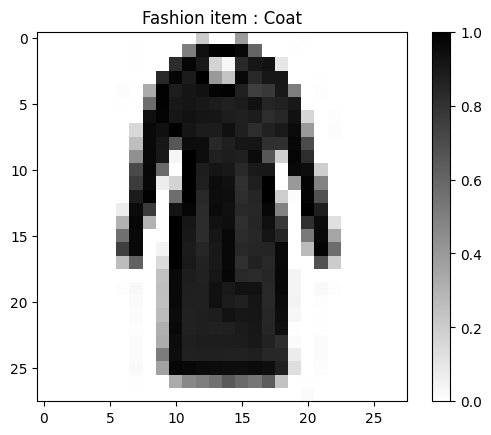

Prediction : Dress


In [ ]:
pred_from_inp(5036)